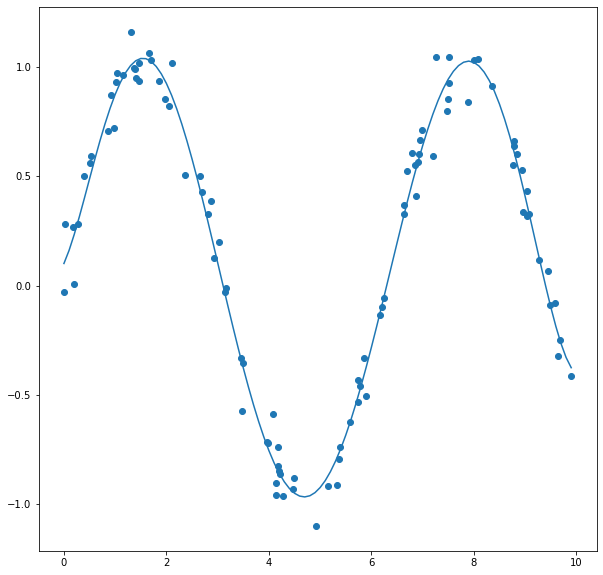

In [12]:
# 如果做 polynomial regression 用 pipeline 簡化操作
import numpy as np
from sklearn.pipeline import make_pipeline
import matplotlib.pyplot as plt
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
plt.rcParams['figure.figsize'] = [10, 10]

poly_model = make_pipeline(PolynomialFeatures(7), LinearRegression())

rng = np.random.RandomState(1)

x = 10 * rng.rand(100)
y = np.sin(x) + 0.1 * rng.randn(100)

xfit = np.arange(0, 10, 0.1)

poly_model.fit(x[:, np.newaxis], y)
yfit = poly_model.predict(xfit[:, np.newaxis])

plt.scatter(x, y)
plt.plot(xfit, yfit)


簡化前處理，可以連很多分數憶起測

In [5]:
#利用 pipeline 簡化前處理 
from sklearn.model_selection import cross_val_score
from sklearn.pipeline import make_pipeline
from sklearn import preprocessing
from sklearn import datasets
from sklearn import svm


X, y = datasets.load_iris(return_X_y=True)

preprocessing_SS = preprocessing.StandardScaler()
classifier = svm.SVC(kernel='linear', C=1, random_state=87)


clf = make_pipeline(preprocessing_SS, classifier)
scores = cross_val_score(clf, X, y, cv=5)
scores


array([0.96666667, 1.        , 0.93333333, 0.93333333, 1.        ])

In [6]:
# 如果有很多 metrics 想測
from sklearn.model_selection import cross_validate

scoring = ['precision_macro', 'recall_macro']

scores = cross_validate(clf, X, y, cv=5, scoring=scoring)
scores


{'fit_time': array([0.00199223, 0.00099778, 0.00199223, 0.00100303, 0.0009973 ]),
 'score_time': array([0.00299335, 0.00199461, 0.00103498, 0.00099039, 0.00195599]),
 'test_precision_macro': array([0.96969697, 1.        , 0.94444444, 0.93333333, 1.        ]),
 'test_recall_macro': array([0.96666667, 1.        , 0.93333333, 0.93333333, 1.        ])}